In [1]:
import pandas as pd

In [2]:
LEVEL_TO_MAX_M = {2: 1024, 3: 1280, 5: 1792}

In [3]:
l2 = pd.read_json('l2_dilithium_surplus_total.json')
l2['f'] = LEVEL_TO_MAX_M[2] - l2['m']
l2_surplus_needed = l2[l2['surplus'] > 0]
l2_surplus_needed

,m,percent,surplus,nist_param_level,f
1020,1020,0.996094,2,2,4
1021,1021,0.997070,5,2,3
1022,1022,0.998047,27,2,2
1023,1023,0.999023,103,2,1


In [4]:
l3 = pd.read_json('l3_dilithium_surplus_total.json')
l3['f'] = LEVEL_TO_MAX_M[3] - l3['m']
l3_surplus_needed = l3[l3['surplus'] > 0]
l3_surplus_needed

,m,percent,surplus,nist_param_level,f
1275,1275,0.996094,1,3,5
1276,1276,0.996875,5,3,4
1277,1277,0.997656,7,3,3
1278,1278,0.998437,45,3,2
1279,1279,0.999219,119,3,1


In [5]:
l5 = pd.read_json('l5_surplus_total.json')
l5['f'] = LEVEL_TO_MAX_M[5] - l5['m']
l5_surplus_needed = l5[l5['surplus'] > 0]
l5_surplus_needed

,m,surplus,failure,nist_param_level,percent,good_success_rate,f
1789,1789,1,1,5,0.998326,True,3
1790,1790,1,1,5,0.998884,True,2
1791,1791,59,0,5,0.999442,True,1


In [6]:
all_lvls = l2_surplus_needed.set_index('f').join(l3_surplus_needed.set_index('f'), lsuffix='_l2', rsuffix='_l3', how='outer').join(l5_surplus_needed.set_index('f'), how='outer')#[['surplus_l2_', 'surplus_l3_', 'surplus_l5']].fillna(0)
#all_lvls = pd.concat([l2_surplus_needed.set_index('f'), l3_surplus_needed.set_index('f'), l5_surplus_needed.set_index('f')], verify_integrity=True, ignore_index=True)
all_lvls

,m_l2,percent_l2,surplus_l2,nist_param_level_l2,m_l3,percent_l3,surplus_l3,nist_param_level_l3,m,surplus,failure,nist_param_level,percent,good_success_rate
f,,,,,,,,,,,,,,
1,1023.0,0.999023,103.0,2.0,1279,0.999219,119,3,1791.0,59.0,0.0,5.0,0.999442,True
2,1022.0,0.998047,27.0,2.0,1278,0.998437,45,3,1790.0,1.0,1.0,5.0,0.998884,True
3,1021.0,0.997070,5.0,2.0,1277,0.997656,7,3,1789.0,1.0,1.0,5.0,0.998326,True
4,1020.0,0.996094,2.0,2.0,1276,0.996875,5,3,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1275,0.996094,1,3,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='number of zero-coefficients (f)', ylabel='surplus of equations'>

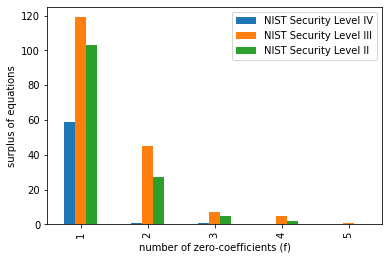

In [7]:
ax = all_lvls[['surplus', 'surplus_l3', 'surplus_l2']].rename(columns={
        'surplus_l2': 'NIST Security Level II',
        'surplus_l3': 'NIST Security Level III',
        'surplus': 'NIST Security Level IV'}
                                                         ).plot(kind='bar')
ax.set_xlabel('number of zero-coefficients (f)')
ax.set_ylabel('surplus of equations')
fig = ax.get_figure()
fig.savefig(f'dilithium_surplus.pdf', format="pdf", bbox_inches='tight', transparent=True)
ax